<a href="https://colab.research.google.com/github/MANOJ-S-NEGI/decisiontree_randomforest_classification/blob/main/dicision_tree_%5Bdiabetic_dataset%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **About Dataset**

**Context**
- This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

**Content**
- The datasets consists of several medical predictor variables and one target variable, Outcome.
- Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [50]:
## importing libraries:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
## calling csv as data:
data  = pd.read_csv("/content/diabetes.csv")
data.sample(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
748,3,187,70,22,200,36.4,0.408,36,1
388,5,144,82,26,285,32.0,0.452,58,1
688,1,140,74,26,180,24.1,0.828,23,0


In [52]:
## checking the null values
print(f"\n null values:\n {data.isnull().sum()}\n")

## checking the sample:
print(f"\ndata_shape\n: {data.shape}\n")


## checking duplicated values:
print(f"duplicated values: {data.duplicated().sum()}\n")

# checking the info
data.info()


 null values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


data_shape
: (768, 9)

duplicated values: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  


In [53]:
## spliting data into features and target values:
x = data.drop("Outcome",axis =1)
y = data["Outcome"]
print(f"shape of feature dataset:{x.shape}")
print(f"shape of target dataset:{y.shape}")

shape of feature dataset:(768, 8)
shape of target dataset:(768,)


In [54]:
# checking 'y' is target :
class_frequencies = pd.Series(y).value_counts()
print(class_frequencies)

## imbalance ratio:
imbalance_ratio = class_frequencies.min() / class_frequencies.max()
print(f"Class Imbalance Ratio: {imbalance_ratio}")


0    500
1    268
Name: Outcome, dtype: int64
Class Imbalance Ratio: 0.536


## visualizing the data:

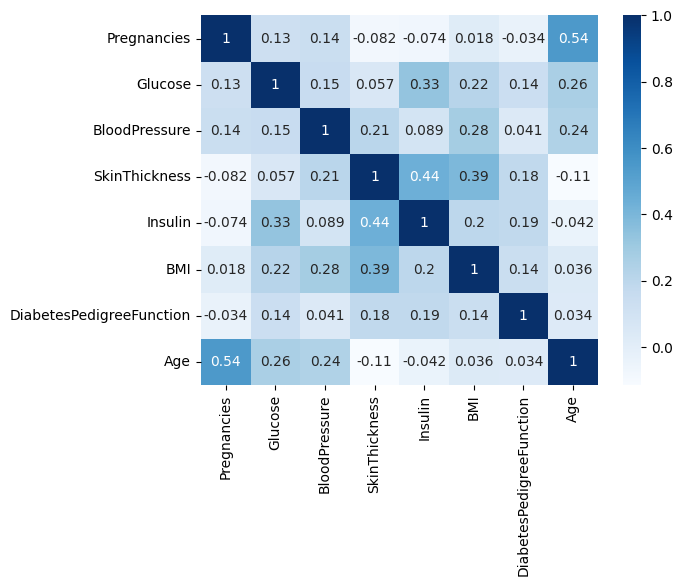

In [55]:
##plotting heatmap:
sns.heatmap(x.corr(), cmap='Blues',annot=True);

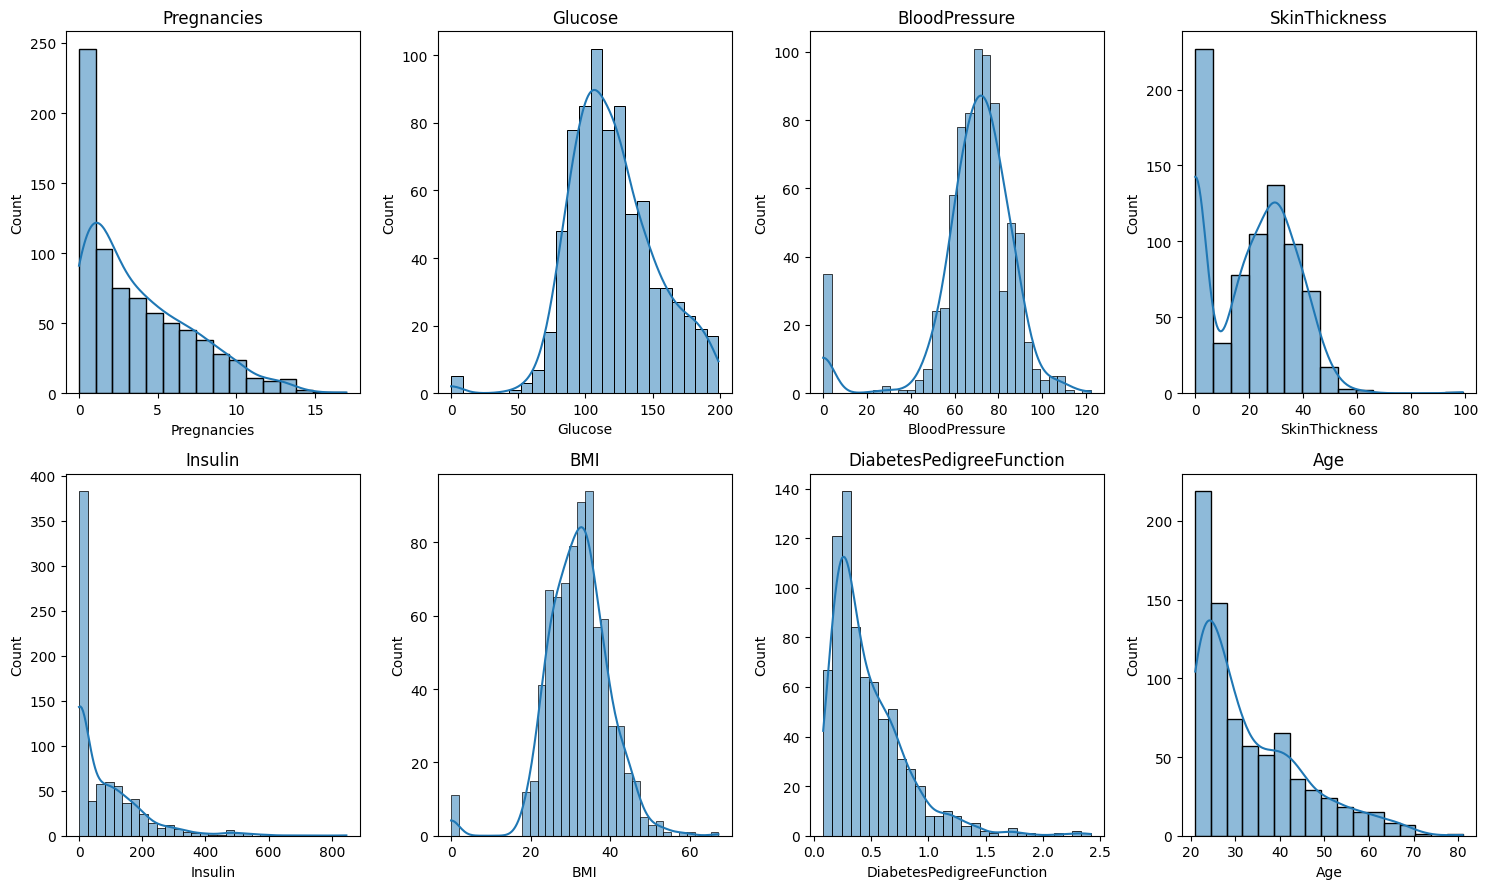

In [56]:
## ploting histplot:

num_rows = 2
num_cols = 4

# Creating grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 9))

# Flatten the axes array so you can loop through it easily
axes = axes.flatten()

# Loop through the columns and plot KDEs
for i, col in enumerate(x.columns):
    sns.histplot(x[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

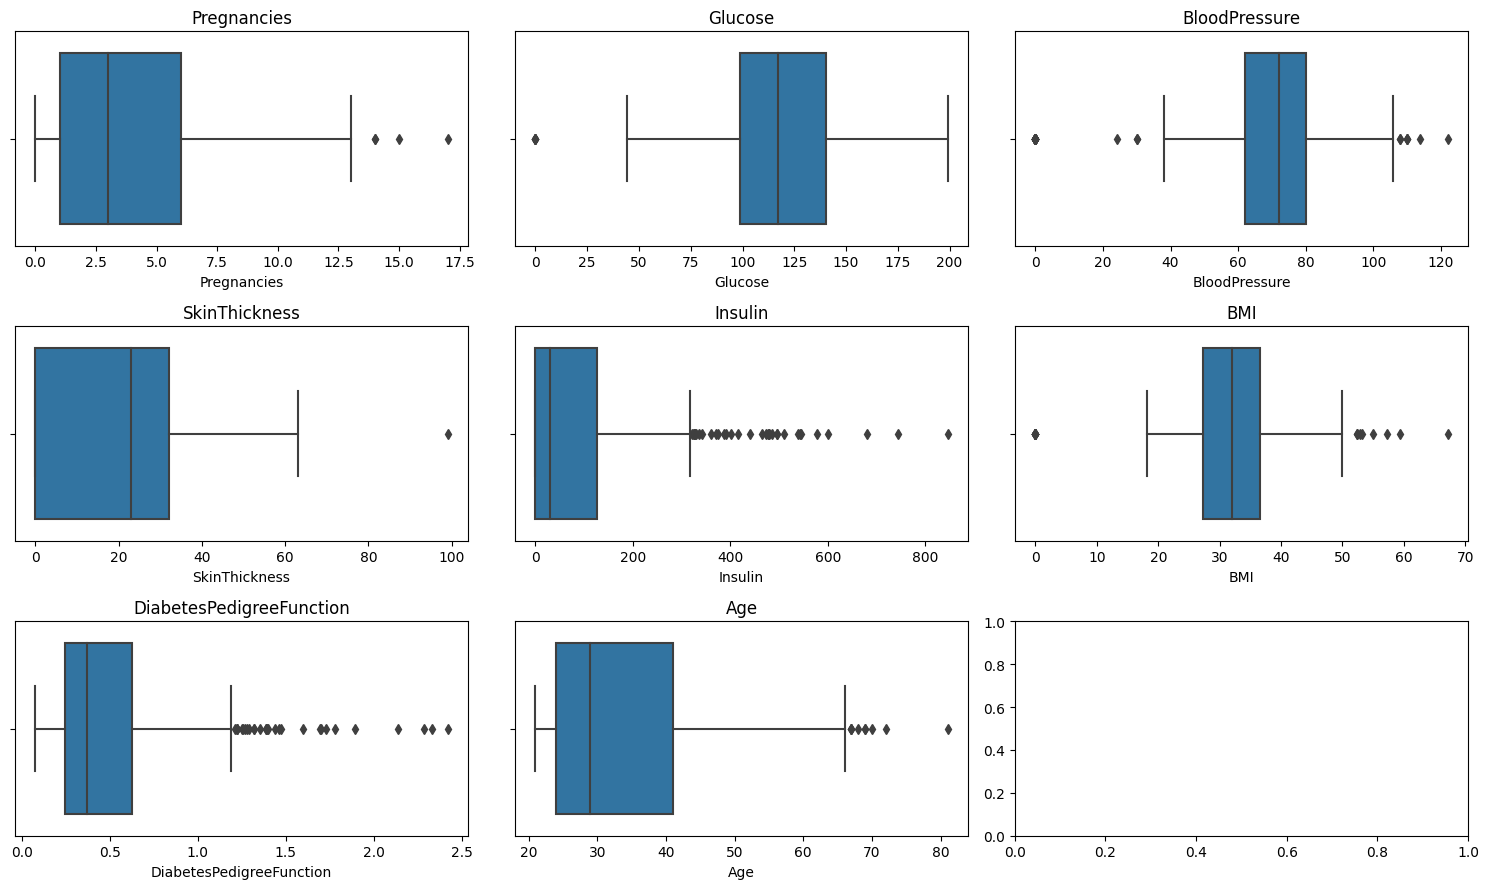

In [57]:
num_rows = 3
num_cols = 3

# Creating grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 9))

# Flatten the axes array so you can loop through it easily
axes = axes.flatten()

# Loop through the columns and plot KDEs
for i, col in enumerate(x.columns):
    sns.boxplot(data=data,x = col,ax=axes[i])
    axes[i].set_title(col)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [58]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


In [59]:

def ranges(column,quant_1,quant_3):

    q1 = np.percentile(column,quant_1)
    q3 = np.percentile(column,quant_3)
    iqr = q3-q1

    ## higher bound:
    lower_bound = q1 = (1.5 * iqr)
    higher_bound = q3 + (1.5 * iqr)

    lower_bound = np.round(lower_bound,2)
    higher_bound = np.round(higher_bound,2)


    print(f"Q1 ({quant_1} percentile){q1}")
    print(f"Q3 ({quant_3} percentile){q3}")
    print(f"inter qantile range: {iqr}")
    print(f"lower_fence:{lower_bound}")
    print(f"higher_fence:{higher_bound}")

In [60]:
## checking rnage of pregnancy columns:
ranges(x.Pregnancies,25,75)

Q1 (25 percentile)7.5
Q3 (75 percentile)6.0
inter qantile range: 5.0
lower_fence:7.5
higher_fence:13.5


In [61]:
## total count above 13
x[x['Pregnancies'] > 13]['Pregnancies'].count()

4

In [62]:
preg_higher_bound = 13
for i in range(len(x.Pregnancies)):
    if x.Pregnancies.values[i] > preg_higher_bound:
        x.Pregnancies.values[i] = preg_higher_bound


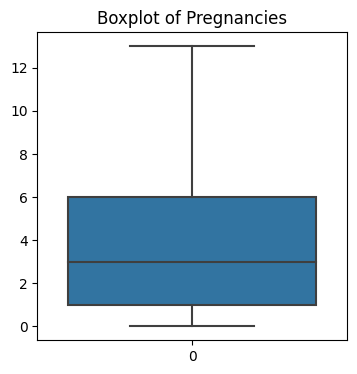

In [63]:
# ploting boxplot:
plt.figure(figsize=(4,4))
sns.boxplot(x.Pregnancies)
plt.title('Boxplot of Pregnancies');

In [64]:
## checking columns for Glucose:
## checking range of Glucose columns:
ranges(x.Glucose,30,75)

Q1 (30 percentile)57.375
Q3 (75 percentile)140.25
inter qantile range: 38.25
lower_fence:57.38
higher_fence:197.62


In [65]:
## total count above lower fence
x[x['Glucose'] < 40]['Glucose'].count()

5

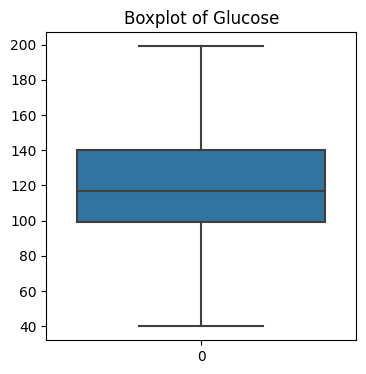

In [66]:
glu_low_bound = 40
for i in range(len(x.Glucose)):
    if x.Glucose.values[i] < glu_low_bound:
        x.Glucose.values[i] = glu_low_bound

# ploting boxplot:
plt.figure(figsize=(4,4))
sns.boxplot(x.Glucose)
plt.title('Boxplot of Glucose');


In [67]:
## checking columns for BloodPressure:
## checking range of BloodPressure columns:
ranges(x.BloodPressure,15,75)

Q1 (15 percentile)33.0
Q3 (75 percentile)80.0
inter qantile range: 22.0
lower_fence:33.0
higher_fence:113.0


In [68]:
## total count above lower fence
x['BloodPressure'].mean()

69.10546875

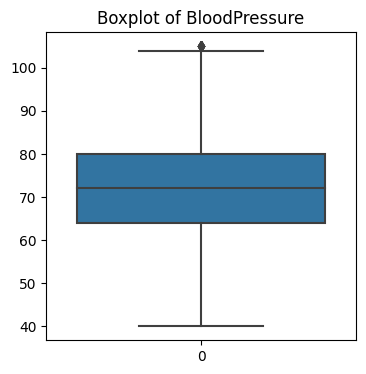

In [69]:
bp_low_bound = 40
bp_high_bound = 105
for i in range(len(x.BloodPressure)):
    if x.BloodPressure.values[i] < bp_low_bound:
        x.BloodPressure.values[i] = x['BloodPressure'].mean()
    elif x.BloodPressure.values[i] > bp_high_bound:
        x.BloodPressure.values[i] = bp_high_bound

# ploting boxplot:
plt.figure(figsize=(4,4))
sns.boxplot(x.BloodPressure)
plt.title('Boxplot of BloodPressure');


In [70]:
## checking columns for Insulin:
## checking range of Insulin columns:
ranges(x.Insulin,15,80)

Q1 (15 percentile)225.0
Q3 (80 percentile)150.0
inter qantile range: 150.0
lower_fence:225.0
higher_fence:375.0


In [71]:
x[x.Insulin > 375]['Insulin'].count()

22

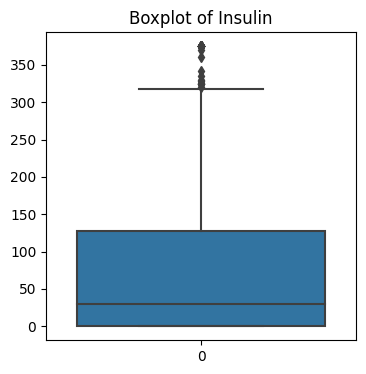

In [72]:
Insulin_high_bound = 375
for i in range(len(x.Insulin)):
    if x.Insulin.values[i] > Insulin_high_bound:
        x.Insulin.values[i] = Insulin_high_bound

# ploting boxplot:
plt.figure(figsize=(4,4))
sns.boxplot(x.Insulin)
plt.title('Boxplot of Insulin');

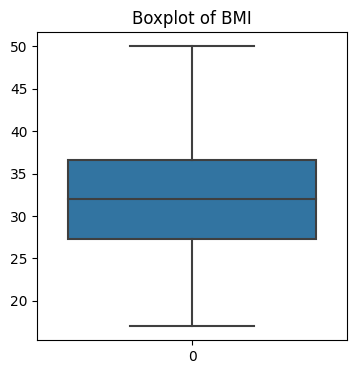

In [73]:
## checking columns for BMI:
## handling range of BMI columns:
"""
Underweight: BMI less than 18.5
Normal weight: BMI 18.5 to 24.9
Overweight: BMI 25 to 29.9
Obesity: BMI 30 or higher
"""

bmi_high_bound = 50
bmi_low_bound = 17

for i in range(len(x.BMI)):
    if x.BMI.values[i] > bmi_high_bound:
        x.BMI.values[i] = bmi_high_bound
    if x.BMI.values[i] < bmi_low_bound:
        x.BMI.values[i] = bmi_low_bound

# ploting boxplot:
plt.figure(figsize=(4,4))
sns.boxplot(x.BMI)
plt.title('Boxplot of BMI');

In [74]:
x[x.DiabetesPedigreeFunction > 1.2]['DiabetesPedigreeFunction'].count()

29

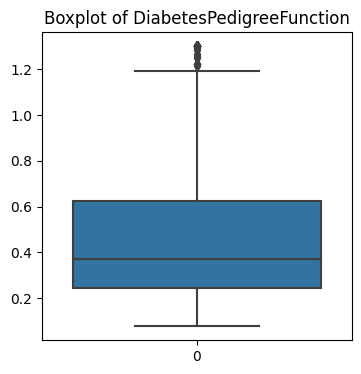

In [75]:
## checking columns for DiabetesPedigreeFunction:
## handling range of DiabetesPedigreeFunction columns:
"""
"""

DiabetesPedigreeFunction_high_bound = 1.3


for i in range(len(x.DiabetesPedigreeFunction)):
    if x.DiabetesPedigreeFunction.values[i] > DiabetesPedigreeFunction_high_bound:
        x.DiabetesPedigreeFunction.values[i] = DiabetesPedigreeFunction_high_bound


# ploting boxplot:
plt.figure(figsize=(4,4))
sns.boxplot(x.DiabetesPedigreeFunction)
plt.title('Boxplot of DiabetesPedigreeFunction');

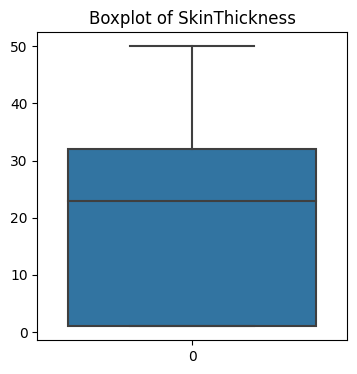

In [76]:
## checking columns for SkinThickness:
## handling range of SkinThickness columns:
"""
"""

SkinThickness_high_bound = 50
SkinThickness_lower_bound = 1.5


for i in range(len(x.SkinThickness)):
    if x.SkinThickness.values[i] < SkinThickness_lower_bound:
        x.SkinThickness.values[i] = SkinThickness_lower_bound

    if x.SkinThickness.values[i] > SkinThickness_high_bound:
        x.SkinThickness.values[i] = SkinThickness_high_bound


# ploting boxplot:
plt.figure(figsize=(4,4))
sns.boxplot(x.SkinThickness)
plt.title('Boxplot of SkinThickness');

In [77]:
## checking columns for Age:
## handling range of Age columns:
"""
"""

Age_high_bound = 70


for i in range(len(x.Age)):
    if x.Age.values[i] > Age_high_bound:
        x.Age.values[i] = SkinThickness_lower_bound

In [78]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.834635,3.336808,0.000,1.00000,3.0000,6.00000,13.0
Glucose,768.0,121.154948,31.137801,40.000,99.00000,117.0000,140.25000,199.0
BloodPressure,768.0,72.446615,11.509636,40.000,64.00000,72.0000,80.00000,105.0
SkinThickness,768.0,20.713542,15.231845,1.000,1.00000,23.0000,32.00000,50.0
Insulin,768.0,75.600260,99.048868,0.000,0.00000,30.5000,127.25000,375.0
BMI,768.0,32.171615,6.907363,17.000,27.30000,32.0000,36.60000,50.0
DiabetesPedigreeFunction,768.0,0.462083,0.294203,0.078,0.24375,0.3725,0.62625,1.3
Age,768.0,33.044271,11.663720,1.000,24.00000,29.0000,40.25000,70.0


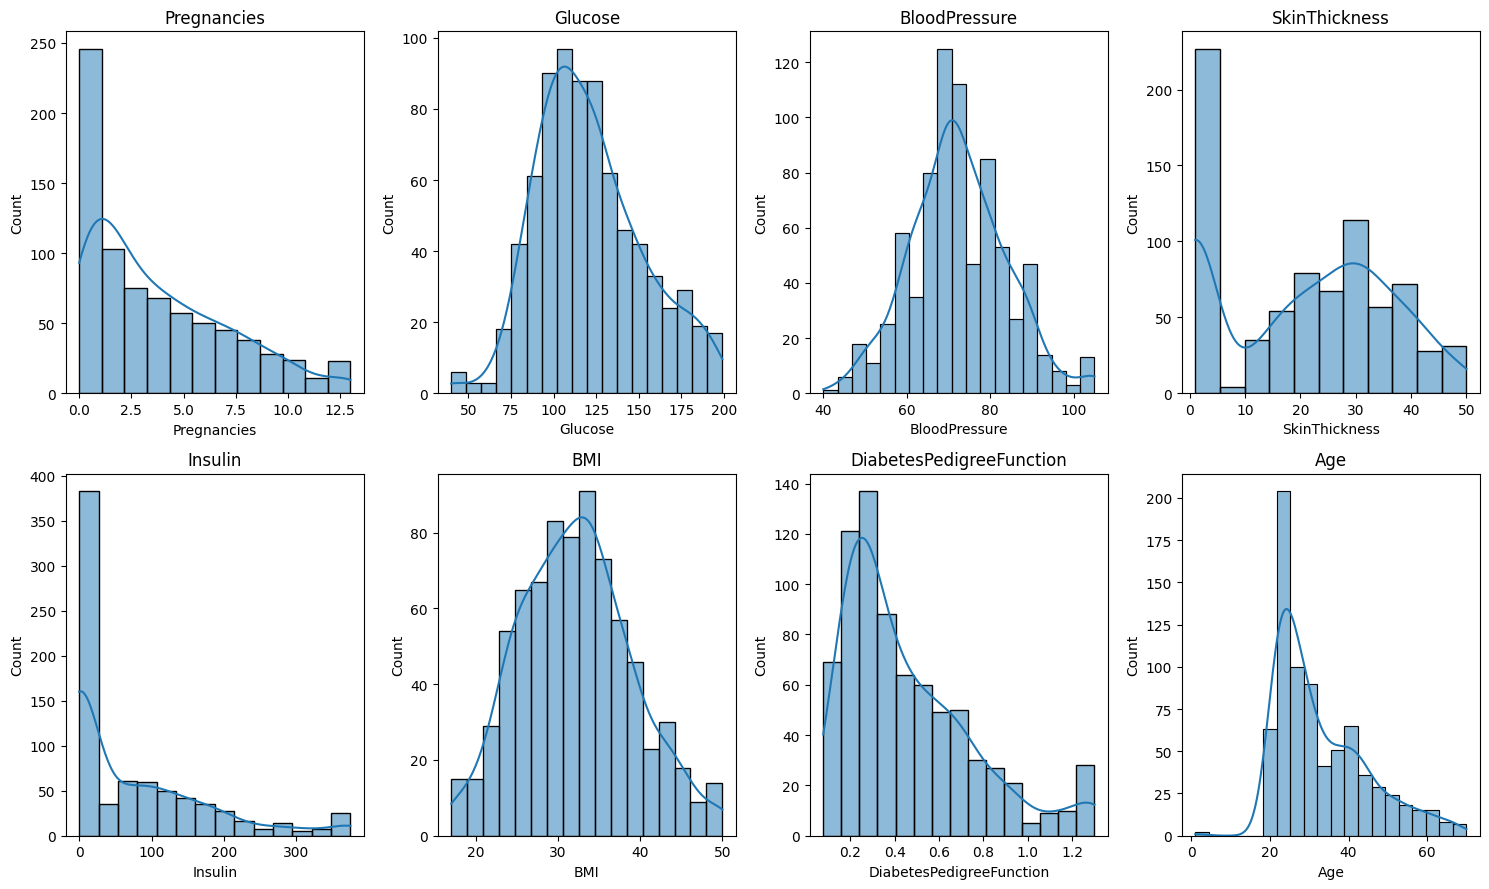

In [30]:
## ploting histplot:

num_rows = 2
num_cols = 4

# Creating grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 9))

# Flatten the axes array so you can loop through it easily
axes = axes.flatten()

# Loop through the columns and plot KDEs
for i, col in enumerate(x.columns):
    sns.histplot(x[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

## we will be using Decision tree so no scaling is required: futhermore
- we will do train test split
- we will find the right parameter
- tain the model

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

print("shape of x_train{} and have dimension: {}".format(x_train.shape, x_train.ndim))
print("shape of y_train{} and have dimension: {}" .format(y_train.shape, y_train.ndim))
print("shape of x_test{}  and have dimension: {}".format(x_test.shape, x_test.ndim))
print("shape of y_test{} and have dimension: {}".format(y_test.shape, x_test.ndim))


shape of x_train(614, 8) and have dimension: 2
shape of y_train(614,) and have dimension: 1
shape of x_test(154, 8)  and have dimension: 2
shape of y_test(154,) and have dimension: 2


In [32]:
from  sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

###Creating the model
dtc = DecisionTreeClassifier()

In [33]:
'''
## setting parameters:
# Define the hyperparameter grid
param_grid = {"criterion" : ['gini', 'entropy'],
              "splitter"  : ['best', 'random'],
              "max_depth" : range(2,15,2),
              "min_samples_split" : range(2,15,2),
              "min_samples_leaf" :range(2,15,2),
              "max_features" : ['sqrt', 'log2', None]
              }


# Create the GridSearchCV object
grid_search = GridSearchCV(dtc, param_grid, cv = 5, scoring = 'accuracy', n_jobs = -1, verbose = 2)


## training the model:

trained_model = grid_search.fit(x_train, y_train)
# Get the best hyperparameters
best_params = grid_search.best_params_
best_params
'''

'\n## setting parameters:\n# Define the hyperparameter grid\nparam_grid = {"criterion" : [\'gini\', \'entropy\'],\n              "splitter"  : [\'best\', \'random\'],\n              "max_depth" : range(2,15,2),\n              "min_samples_split" : range(2,15,2),\n              "min_samples_leaf" :range(2,15,2),\n              "max_features" : [\'sqrt\', \'log2\', None]\n              }\n\n\n# Create the GridSearchCV object\ngrid_search = GridSearchCV(dtc, param_grid, cv = 5, scoring = \'accuracy\', n_jobs = -1, verbose = 2)\n\n\n## training the model:\n\ntrained_model = grid_search.fit(x_train, y_train)\n# Get the best hyperparameters\nbest_params = grid_search.best_params_\nbest_params\n'

```
Fitting 5 folds for each of 4116 candidates, totalling 20580 fits
{'criterion': 'entropy',
 'max_depth': 12,
 'max_features': 'log2',
 'min_samples_leaf': 14,
 'min_samples_split': 8,
 'splitter': 'best'}
 ```

In [34]:
## oversampling count in target column:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))


Before OverSampling, counts of label '1': 213
Before OverSampling, counts of label '0': 401 



In [35]:
# import SMOTE module from imblearn library
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train_res, y_train_res = smote.fit_resample(x_train, y_train.ravel())

## checking shape
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
## checking frequency:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))


After OverSampling, the shape of train_X: (802, 8)
After OverSampling, the shape of train_y: (802,) 

After OverSampling, counts of label '1': 401
After OverSampling, counts of label '0': 401


In [36]:
## fitting dtc model:

parameters = {'criterion': 'entropy',
              'max_depth': 12,
              'max_features': 'log2',
              'min_samples_leaf': 14,
              'min_samples_split': 8,
              'splitter': 'best'}

model = DecisionTreeClassifier(**parameters, random_state=0)
dici_model = model.fit(x_train_res, y_train_res)

In [37]:
## making predictions :
y_pred = dici_model.predict(x_test)


In [38]:
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

In [39]:
## printig report:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.73      0.76        99
           1       0.58      0.67      0.62        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.71      0.71       154



In [40]:
## printing f1 and accuracy score
f1 = f1_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(f"f1_score : {round(f1,2)}")
print(f"accuracy_score: {round(acc,2)}")


f1_score : 0.62
accuracy_score: 0.71


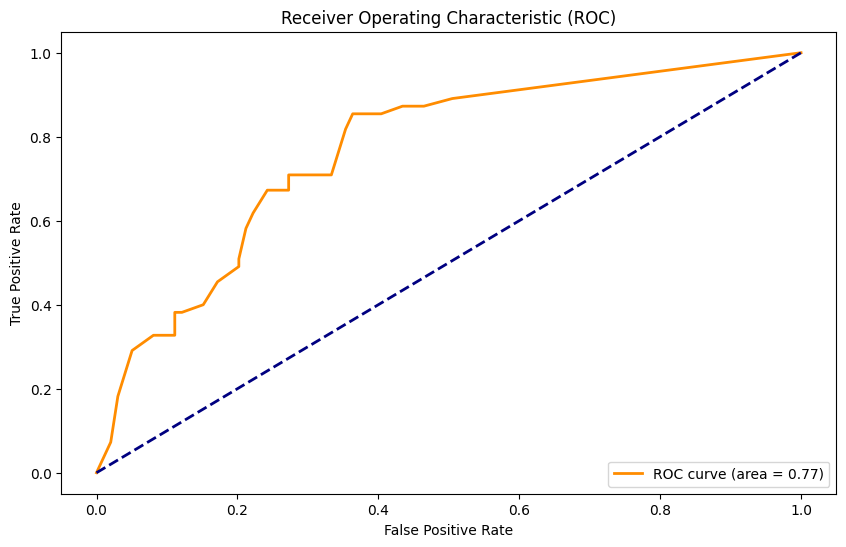

In [41]:
#dicted probabilities for class 1 (assuming it's a binary classification problem)
y_prob = model.predict_proba(x_test)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()




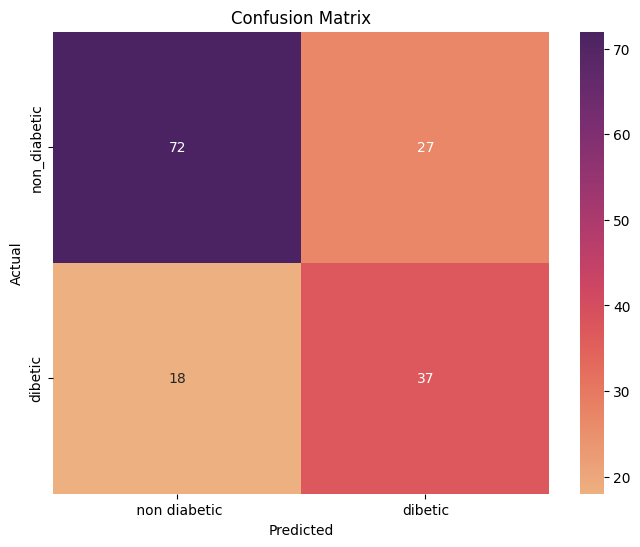

In [42]:
# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a figure
plt.figure(figsize=(8, 6))

# Use Seaborn's heatmap to plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='flare', cbar=True,
            xticklabels=[' non diabetic', 'dibetic'], yticklabels=['non_diabetic', 'dibetic'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [43]:
## compairing the prediction with truth values:
print("y_pred dimensions :",y_pred.ndim)
print("y_test dimension :", y_test.ndim)
"""
y_pred_flatten = y_pred.flatten()
y_test_flatten = y_test.values.flatten()
print(y_pred_flatten.ndim)
print(y_test_flatten.ndim)
"""

prediction_result = []

j=0
for i in y_test:
    if i == y_pred[j]:
        results = "correct_prediction"
        prediction_result.append(results)

    else:
        results = "wrong_prediction"
        prediction_result.append(results)
    j = j+1



## for actual and pred naming:

class_name = ["Non_Diabetic", "Diabetic"]
y_test_class = []
y_pred_class = []

for y in y_test:
    y_test_class.append(class_name[y])

for yp in y_pred:
    y_pred_class.append(class_name[yp])



prediction_table = pd.DataFrame({'Actual': y_test_class, 'Predict' : y_pred_class , "prediction_result" : prediction_result })


y_pred dimensions : 1
y_test dimension : 1


In [44]:
prediction_table.sample(50)

,Actual,Predict,prediction_result
140,Non_Diabetic,Non_Diabetic,correct_prediction
94,Non_Diabetic,Diabetic,wrong_prediction
144,Non_Diabetic,Non_Diabetic,correct_prediction
150,Non_Diabetic,Non_Diabetic,correct_prediction
136,Diabetic,Diabetic,correct_prediction
69,Diabetic,Diabetic,correct_prediction
97,Non_Diabetic,Non_Diabetic,correct_prediction
46,Diabetic,Diabetic,correct_prediction
11,Non_Diabetic,Diabetic,wrong_prediction
51,Diabetic,Diabetic,correct_prediction


---
---

In [80]:
### save csv :
y_frame = pd.DataFrame(y)
combined_df = x.join(y_frame)


In [82]:
combined_df.to_csv('diabetic_clean.csv', index=False)